# WeatherPy
----

#### Observable Trends
* Temperature decreases as you move away from the equator in both the North and South Hempisphere
* Cloudiness has a weak correlation to latitude in both the North and South hemisphere
* Humidity also has a weak correlation as you increase in latitude in the North and South Hemisphere

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
api_key = weather_api_key
query_url = url + api_key

cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0

print("Beginning Data Retrieval")
print("--------------------------------")

for city in cities:
    weather_response = requests.get(query_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        cityname.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print ("City not found. Skipping...")
        pass
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")


Beginning Data Retrieval
--------------------------------
Processing record 1 of Set 1 | hithadhoo
Processing record 2 of Set 1 | ushuaia
Processing record 3 of Set 1 | khandyga
Processing record 4 of Set 1 | mataura
City not found. Skipping...
Processing record 5 of Set 1 | vaini
Processing record 6 of Set 1 | tuktoyaktuk
Processing record 7 of Set 1 | cabo san lucas
Processing record 8 of Set 1 | dingle
Processing record 9 of Set 1 | san patricio
Processing record 10 of Set 1 | chuy
Processing record 11 of Set 1 | muroto
Processing record 12 of Set 1 | rikitea
Processing record 13 of Set 1 | atuona
Processing record 14 of Set 1 | arraial do cabo
Processing record 15 of Set 1 | georgetown
Processing record 16 of Set 1 | guerrero negro
City not found. Skipping...
City not found. Skipping...
Processing record 17 of Set 1 | bredasdorp
Processing record 18 of Set 1 | bethel
Processing record 19 of Set 1 | bluff
Processing record 20 of Set 1 | jamestown
Processing record 21 of Set 1 | new 

Processing record 185 of Set 1 | pevek
Processing record 186 of Set 1 | banff
Processing record 187 of Set 1 | jaguarao
Processing record 188 of Set 1 | jalu
Processing record 189 of Set 1 | joacaba
Processing record 190 of Set 1 | maputo
Processing record 191 of Set 1 | launceston
Processing record 192 of Set 1 | wanning
Processing record 193 of Set 1 | bandundu
Processing record 194 of Set 1 | luanda
Processing record 195 of Set 1 | fortuna
Processing record 196 of Set 1 | kurayoshi
Processing record 197 of Set 1 | san felipe
City not found. Skipping...
City not found. Skipping...
Processing record 198 of Set 1 | eyl
Processing record 199 of Set 1 | waddan
Processing record 200 of Set 1 | ribeira grande
Processing record 201 of Set 1 | gamboula
Processing record 202 of Set 1 | edd
Processing record 203 of Set 1 | aklavik
Processing record 204 of Set 1 | brae
Processing record 205 of Set 1 | zhigansk
Processing record 206 of Set 1 | bocas del toro
City not found. Skipping...
Processin

Processing record 368 of Set 1 | tezu
Processing record 369 of Set 1 | norman wells
Processing record 370 of Set 1 | tegh
Processing record 371 of Set 1 | bom jesus
Processing record 372 of Set 1 | kavaratti
Processing record 373 of Set 1 | gat
Processing record 374 of Set 1 | dicabisagan
Processing record 375 of Set 1 | batagay-alyta
Processing record 376 of Set 1 | stephenville
Processing record 377 of Set 1 | fairbanks
Processing record 378 of Set 1 | sokone
Processing record 379 of Set 1 | boa vista
Processing record 380 of Set 1 | seredka
City not found. Skipping...
Processing record 381 of Set 1 | loviisa
Processing record 382 of Set 1 | ullapool
Processing record 383 of Set 1 | komsomolskiy
Processing record 384 of Set 1 | honiara
Processing record 385 of Set 1 | beira
Processing record 386 of Set 1 | villa carlos paz
Processing record 387 of Set 1 | kalangala
Processing record 388 of Set 1 | lethem
City not found. Skipping...
Processing record 389 of Set 1 | praia
Processing re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather_dict = {"City": cityname,"Cloudiness": cloudiness,"Country": country,
                "Date": date,"Humidity": humidity,"Latitude": lat,
                "Longitude": lng,"Max Temp": max_temp,"Wind Speed": wind_speed}

weather_df = pd.DataFrame(weather_dict)
weather_df.head(10)


,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Hithadhoo,45,MV,1586692800,66,-0.6000,73.0833,85.57,9.53
1,Ushuaia,74,AR,1586692800,83,-54.8000,-68.3000,37.54,3.76
2,Khandyga,100,RU,1586692800,97,62.6667,135.6000,29.32,3.29
3,Mataura,94,NZ,1586692800,92,-46.1927,168.8643,51.57,10.29
4,Vaini,88,TO,1586692800,65,-21.2000,-175.2000,76.78,8.59
5,Tuktoyaktuk,84,CA,1586692800,96,69.4541,-133.0374,14.02,7.92
6,Cabo San Lucas,19,MX,1586692800,67,22.8909,-109.9124,60.35,10.63
7,Dingle,50,PH,1586692800,76,10.9995,122.6711,80.58,5.86
8,San Patricio,83,MX,1586692800,63,19.2167,-104.7000,72.48,5.66
9,Chui,3,UY,1586692800,77,-33.6971,-53.4616,63.30,2.10


In [13]:
weather_df.to_csv("weather_df.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

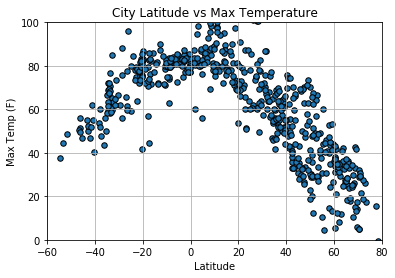

In [14]:
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], marker='o',s=30, edgecolors= "black")
plt.title("City Latitude vs Max Temperature")

plt.ylim(0,100)
plt.xlim(-60, 80)

plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig(f"Figures/Lat_vs_Temp.png")

#####  
This code analyzes the max temperature of each city vs latitude. From the graph you can see that as you move higher or lower from the equator (0), the temperature decreases. The equator shows the highest recorded temperatures. 


#### Latitude vs. Humidity Plot

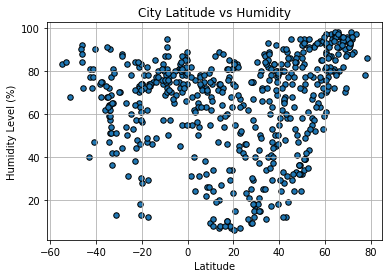

In [15]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity Level (%)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig(f"Figures/Lat_vs_Hum.png")

#####  
This code analyzes the Humidity of each city vs latitude. There does not seem to be a strong correlation between Humidity and Latitude. However, it does seem that more cities have humidity above 60%.

#### Latitude vs. Cloudiness Plot

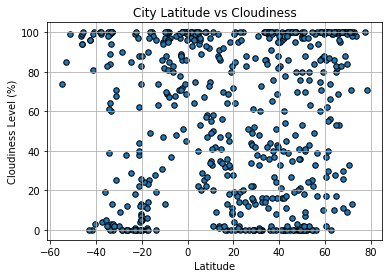

In [16]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness Level (%)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig(f"Figures/Lat_vs_Cloud.png")

#####  
This code analyzes the Cloudiness of each city vs latitude. Cloudiness and latitude also do not show a strong correlation. 

#### Latitude vs. Wind Speed Plot

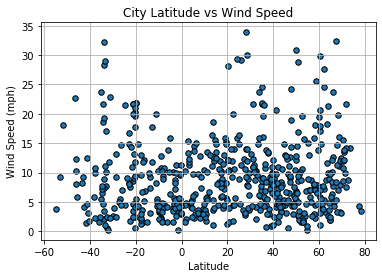

In [17]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig(f"Figures/Lat_vs_Wind.png")


#####  
This code analyzes the wind speed of each city vs latitude. This plot suggests there is no correlation between wind speed and latitude because a majority of the cities show less than 10mph for wind speed. 

## Linear Regression

In [24]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_title, y_title, hemisphere, filename, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(f"{hemisphere} {x_title} vs. {y_title}")
    print(f"The r-squared is: {rvalue}")
    plt.savefig(f"Figures/{filename}")
    plt.show()

In [25]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi = weather_df.loc[weather_df["Latitude"] >= 0]
south_hemi = weather_df.loc[weather_df["Latitude"] <= 0]

north_hemi.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
2,Khandyga,100,RU,1586692800,97,62.6667,135.6000,29.32,3.29
5,Tuktoyaktuk,84,CA,1586692800,96,69.4541,-133.0374,14.02,7.92
6,Cabo San Lucas,19,MX,1586692800,67,22.8909,-109.9124,60.35,10.63
7,Dingle,50,PH,1586692800,76,10.9995,122.6711,80.58,5.86
8,San Patricio,83,MX,1586692800,63,19.2167,-104.7000,72.48,5.66


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.857379211611541


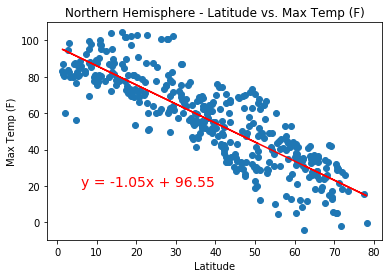

In [26]:
x_values = north_hemi["Latitude"]
y_values = north_hemi["Max Temp"]
plot_linear_regression(x_values,y_values,"Latitude",
                       "Max Temp (F)","Northern Hemisphere -",
                       "North_TempVsLat.png",(6,20))



####  
This linear regression model has a r-squared value of -0.85. This shows a strong negative relationship between latitude and decreasing temperature in the Northern Hemisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.749483567370297


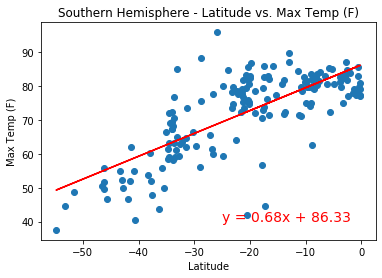

In [27]:
x_values = south_hemi["Latitude"]
y_values = south_hemi["Max Temp"]
plot_linear_regression(x_values,y_values,"Latitude",
                       "Max Temp (F)","Southern Hemisphere -",
                       "South_TempVsLat.png",(-25, 40))


####   
This linear regression model has a r-squared value of 0.75 meaning a 75% in variance. This shows a positive relationship between latitude and increasing temperature in the Southern Hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.4533125761685469


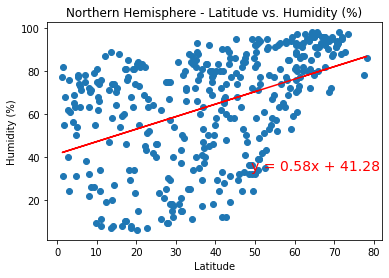

In [28]:
x_values = north_hemi["Latitude"]
y_values = north_hemi["Humidity"]
plot_linear_regression(x_values,y_values,"Latitude",
                       "Humidity (%)","Northern Hemisphere -",
                       "North_HumVsLat.png",(49,34))


####  
The scatter plot shows a weak relationship between humidity and latitude in the Northern Hemisphere with a 0.45 r-squared value. Nearly half of the variance is unexplained by the line of best fit. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.13486246482127104


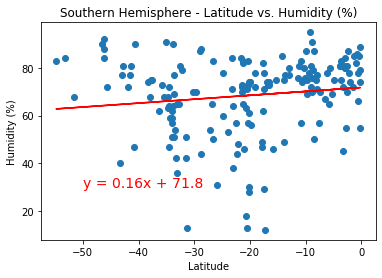

In [29]:
x_values = south_hemi["Latitude"]
y_values = south_hemi["Humidity"]
plot_linear_regression(x_values,y_values,"Latitude",
                       "Humidity (%)","Southern Hemisphere -",
                       "South_HumVsLat.png",(-50,30))


####  
This scatter plot shows an even weaker relationship between humidity and latitude in the Southern Hemisphere with a r-squared value of 0.13. This means there is little correlation and a majority of the variance is unexplained by the line of best fit. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.15105025003777367


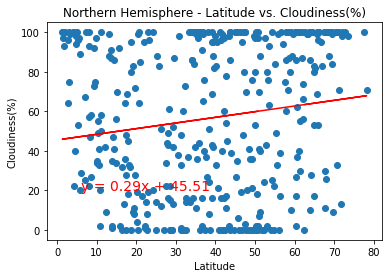

In [30]:
x_values = north_hemi["Latitude"]
y_values = north_hemi["Cloudiness"]
plot_linear_regression(x_values,y_values,"Latitude",
                       "Cloudiness(%)","Northern Hemisphere -",
                       "North_CloudVsLat.png",(6,20))


####   
In this scatterplot of Cloudiness versus latitude in the Northern Hemisphere, the is a very low correlation since the r-squared value is 0.15. We can tell just by looking that there is alot of randomness throughout the graph which supports the low correlation as shown by the r-squared value.


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.20386847763744256


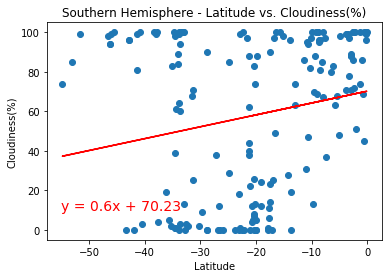

In [31]:
x_values = south_hemi["Latitude"]
y_values = south_hemi["Cloudiness"]
plot_linear_regression(x_values,y_values,"Latitude",
                       "Cloudiness(%)","Southern Hemisphere -",
                       "South_CloudVsLat.png",(-55,10))


####  
Cloudiness versus Latitude in the Southern Hemisphere also shows a weak correlation. We can conclude that with the r-squared value being 0.20, only 20% of the variance can be explained by the linear regression line.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06794304490958883


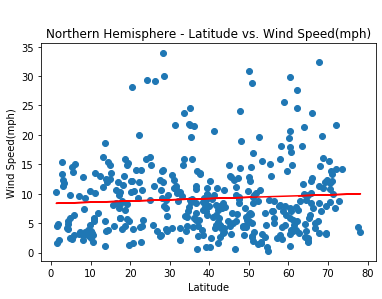

In [32]:
x_values = north_hemi["Latitude"]
y_values = north_hemi["Wind Speed"]
plot_linear_regression(x_values,y_values,"Latitude",
                       "Wind Speed(mph)","Northern Hemisphere -",
                       "North_WindVsLat.png",(6,40))


####   
The correlation between wind speed and latitude in the Northern Hemisphere is very low. The r-squared value is the lowest of the comparisons that were examined so far. Only 6% of the variance is accounted for by the linear regression line. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.19723248497041956


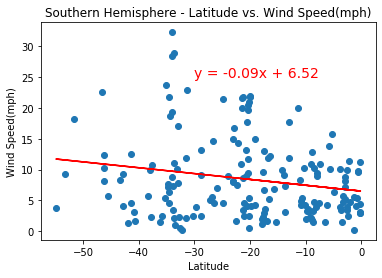

In [34]:
x_values = south_hemi["Latitude"]
y_values = south_hemi["Wind Speed"]
plot_linear_regression(x_values,y_values,"Latitude",
                       "Wind Speed(mph)","Southern Hemisphere -",
                       "South_WindVsLat.png",(-30,25))


####   
There is a slightly stronger correlation between wind speed and latitude in the Southern Hemisphere; however, it is still weak. As we move closer to the equator, there is less wind speed. 